# Кілька простих експериментів

Просто приклади розв'язування деяких завдань з курсу Дискретної математики (і не тільки) засобами Python.

## 1. Діаграми Венна

Детальніше про те як будувати такі діаграми з допомогою Python можна почитати [тут](https://towardsdatascience.com/how-to-create-and-beautify-venn-diagrams-in-python-331129bd4ed3)

In [11]:
# встановлюємо потрібний пакет
!pip install matplotlib_venn

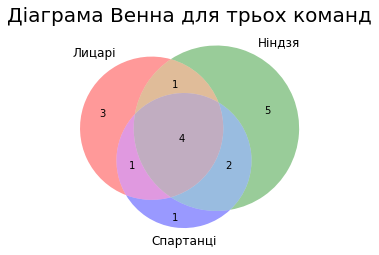

In [12]:
# імпорт бібліотек
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

# такий варіант мені не подобається
# venn2(subsets = (30, 10, 5), set_labels = ('Group A', 'Group B'))
# venn3(subsets = (20, 10, 12, 10, 9, 4, 3), set_labels = ('Group A', 'Group B', 'Group C'), alpha = 0.5);

plt.title("Діаграма Венна для трьох команд",fontsize=20);

Team1=['Алдик','Бабич','Кишинець','Сидоренко','Майборода','Волков','Меркуце','Сизов','Рижій']
Team2=['Бабич','Сидоренко','Майборода','Волков','Мірчук','Рижій','Мацегора','Сизоненко','Уткін','Орлеан','Харченко','Рак']
Team3=['Кишинець','Сидоренко','Майборода','Волков','Поставна','Мірчук','Рижій','Рак']

venn3([set(Team1), set(Team2), set(Team3)],set_labels=('Лицарі', 'Ніндзя', 'Спартанці'))

plt.show()




## 2. Таблиці істинності
Детальніше про виконання подібних завдань з допомогою Python можна почитати [тут](https://pypi.org/project/truth-table-generator/)

In [13]:
# встановлюємо необхідний пакет
!pip install truth-table-generator

     |████████████████████████████████| 9.9 MB 6.6 MB/s eta 0:00:01
  Created wheel for truth-table-generator: filename=truth_table_generator-1.1.2-py3-none-any.whl size=13947 sha256=5d962c4a2597bdaee00b7c446a4b2f262d3c1311d315911a349512fbcbcfb63f
  Stored in directory: /home/jovyan/.cache/pip/wheels/9a/55/b5/77f5756832494eafda92c7a94c1365ac31088a18a3a97dd480
  Created wheel for PTable: filename=PTable-0.9.2-py3-none-any.whl size=22907 sha256=2644c66cc53c849089fad76b2d42e12a4dac653f2b0c996486a517c7a4c1abdd
  Stored in directory: /home/jovyan/.cache/pip/wheels/33/df/2f/674985b3f8a2de3f96357d1eadef5110f74fa91b3785e52a54
Successfully built truth-table-generator PTable


In [17]:
# імпорт бібліотек
import ttg

# стандартний варіант без можливості форматування
print(ttg.Truths(['A', 'B', 'C'], ['A and B and C', 'A or B or C', '(A or (~B)) => C']))

# така ж таблиця, але дещо можна налаштувати
table = ttg.Truths(['A', 'B'], ['A => B', 'A = B'])
print(table.as_tabulate(index=False)) 

# теж непогано оформлено, але мені не дуже подобається
# table.as_pandas().style.set_properties(**{'text-align': 'center'}).hide_index()

+-----+-----+-----+-----------------+---------------+--------------------+
|  A  |  B  |  C  |  A and B and C  |  A or B or C  |  (A or (~B)) => C  |
|-----+-----+-----+-----------------+---------------+--------------------|
|  1  |  1  |  1  |        1        |       1       |         1          |
|  1  |  1  |  0  |        0        |       1       |         0          |
|  1  |  0  |  1  |        0        |       1       |         1          |
|  1  |  0  |  0  |        0        |       1       |         0          |
|  0  |  1  |  1  |        0        |       1       |         1          |
|  0  |  1  |  0  |        0        |       1       |         1          |
|  0  |  0  |  1  |        0        |       1       |         1          |
|  0  |  0  |  0  |        0        |       0       |         0          |
+-----+-----+-----+-----------------+---------------+--------------------+
+-----+-----+----------+---------+
|  A  |  B  |  A => B  |  A = B  |
|-----+-----+----------+------

## 3. Теорія графів
Детальніше про роботу з графами в Python можна почитати [тут](https://www.python-course.eu/graphs_python.php)

In [18]:
# задаємо сам граф - яка вершина з якими пов'язана
graph = { "a" : ["c"],
          "b" : ["c", "e"],
          "c" : ["a", "b", "d", "e"],
          "d" : ["c"],
          "e" : ["c", "b"],
          "f" : []
        }

# функція для створення списку зв'язаних вершин
def generate_edges(graph):
    edges = []
    for node in graph:
        for neighbour in graph[node]:
            edges.append((node, neighbour))

    return edges

print(generate_edges(graph))

[('a', 'c'), ('b', 'c'), ('b', 'e'), ('c', 'a'), ('c', 'b'), ('c', 'd'), ('c', 'e'), ('d', 'c'), ('e', 'c'), ('e', 'b')]


Ось так цей граф можна було б зобразити наочно:
![](https://www.python-course.eu/images/simple_graph_isolated.png)

А тепер спробуємо візуалізувати. Для цього побудуємо мережеву діаграму з використанням бібліотеки [NetworkX](https://www.python-graph-gallery.com/network-chart).
Детальніше дивіться в [галереї діаграм](https://www.python-graph-gallery.com)

In [31]:
# встановлюємо необхідний пакет
!pip install networkx

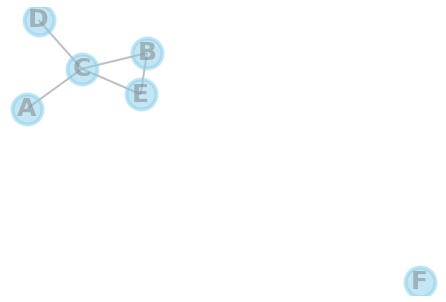

In [28]:
# імпорт бібліотек
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# яка вершина з якою пов'язана - тут слід бути уважним
df = pd.DataFrame({ 'from':['A', 'B', 'C', 'D', 'E', 'F'], 'to':['C', 'E', 'B', 'C', 'C', 'F']})
 
# побудова графа
G=nx.from_pandas_edgelist(df, 'from', 'to')
 
# виводимо результат і налаштовуємо зовнішній вигляд графа
nx.draw(G, with_labels=True, node_size=900, node_color="skyblue", node_shape="o", alpha=0.5, linewidths=4, font_size=25, 
        font_color="grey", font_weight="bold", width=2, edge_color="grey")

## 4. Логіка висловлень
Детальніше про розв'язування завдань такого типу в Python можна почитати [тут](https://docs.sympy.org/latest/modules/logic.html). Використовується бібліотека [SymPy](https://www.sympy.org/en/index.html).

### 4.1. Спрощення виразів

In [32]:
# встановлюємо необхідний пакет
!pip install sympy

In [38]:
# імпорт бібліотек
from sympy.logic import simplify_logic
from sympy.abc import A, B, C
from sympy import S

# наш вираз
x = (~A & ~B & ~C) | ( ~A & ~B & C)

# спрощуємо
simplify_logic(x)

~A & ~B

### 4.2. ДНФ та КНФ
[Диз'юнктивна](https://uk.wikipedia.org/wiki/%D0%94%D0%B8%D0%B7%27%D1%8E%D0%BD%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%B0_%D0%BD%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0_%D1%84%D0%BE%D1%80%D0%BC%D0%B0) нормальна форма та [кон'юнктивна](https://uk.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BD%27%D1%8E%D0%BD%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%B0_%D0%BD%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0_%D1%84%D0%BE%D1%80%D0%BC%D0%B0) нормальна форма

In [40]:
# імпорт бібліотек
from sympy.logic.boolalg import to_cnf
from sympy.abc import A, B, C

# спочатку КНФ
to_cnf(~(A | B) | C)

(C | ~A) & (C | ~B)

In [41]:
# імпорт бібліотек
from sympy.logic.boolalg import to_dnf
from sympy.abc import A, B, C

# а тепер КНФ
to_dnf(B & (A | C))

(A & B) | (B & C)

## 5. Матриці
Детальніше як з ними працювати в Python можна почитати [тут](https://docs.sympy.org/latest/tutorial/matrices.html)

In [48]:
# імпорт бібліотек
from sympy import *

# налаштовуємо виведення
init_printing(use_unicode=True)

# задаємо матриці
M = Matrix([[1, 3], [-2, 3]])
N = Matrix([[0, 3], [0, 7]])

# виводимо першу матрицю
M

⎡1   3⎤
⎢     ⎥
⎣-2  3⎦

In [49]:
# виводимо другу матрицю
N

⎡0  3⎤
⎢    ⎥
⎣0  7⎦

In [50]:
# додаємо їх
M + N

⎡1   6 ⎤
⎢      ⎥
⎣-2  10⎦

In [51]:
# множимо матриці
M*N

⎡0  24⎤
⎢     ⎥
⎣0  15⎦

In [52]:
# транспонуємо першу матрицю
M.T

⎡1  -2⎤
⎢     ⎥
⎣3  3 ⎦

## 6. Інші приклади


### 6.1. Карти 
Детальніше можна почитати в [галереї діаграм](https://www.python-graph-gallery.com/288-map-background-with-folium) та документації до бібліотеки [Folium](https://python-visualization.github.io/folium/quickstart.html)

In [56]:
# встановлюємо необхідний пакет
!pip install folium

In [57]:
# імпорт бібліотеки
import folium

# задаємо координати центру ділянки карти та початковий масштаб
map = folium.Map(location=[49.590033669823875, 34.550941823527936], zoom_start=16)

# задаємо текст спливаючої підказки
tooltip = "Натисни щоб дізнатись більше!"

# обводимо колом наш коледж:)
folium.Circle(
    radius=60,
    location=[49.58771238565784, 34.54304621524288], 
    popup="Полтавський політехнічний коледж",
    color="crimson",
    fill=True,
    fill_color="#3186cc"
).add_to(map)

# ставимо маркер на будівлі коледжа:)
folium.Marker(
    [49.58771238565784, 34.54304621524288], 
    popup="<h3>Полтавський політехнічний коледж</h3><p><img src='https://lh5.googleusercontent.com/p/AF1QipOlUnNjdQfAK43eX9D2GNeUVoBSONhfGbwsT12S=w408-h272-k-no'/><br/><br/><a href='http://www.polytechnic.poltava.ua/' target='blank'>Офіційний сайт...</a></p>", 
    tooltip=tooltip,
    icon=folium.Icon(color="green", icon="info-sign")
).add_to(map)

# виводимо карту
map

### 6.2. QR-коди

In [58]:
# встановлюємо необхідний пакет
!pip install "qrcode[pil]"

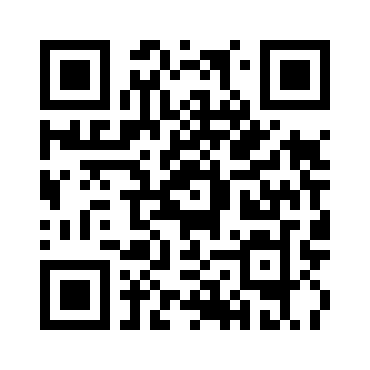

In [59]:
# імпорт бібліотеки
import qrcode

# генеруємо код для сайту коледжу:)
img = qrcode.make('http://polytechnic.poltava.ua')

# виводимо код
img